In [19]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
dataset_path = r"Zoo_DataSet.csv"
zoo_df = pd.read_csv(dataset_path)

# Step 3: View columns to confirm structure (optional)
print("Columns:", zoo_df.columns)

Columns: Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_label'],
      dtype='object')



Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



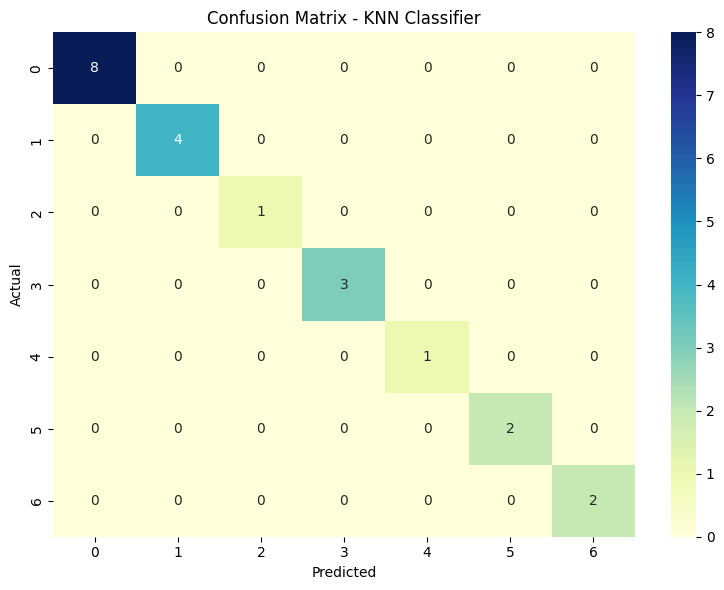

In [20]:
# Step 4: Separate input features and target class
# Update these only if your column names are different
X = zoo_df.drop(columns=['animal_name', 'class_label'])  # Features
y = zoo_df['class_label']  # Target

# Step 5: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Step 7: Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

# Step 8: Predictions and evaluation
y_pred = knn.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGnBu', fmt='d')
plt.title("Confusion Matrix - KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


C:\Users\Lohith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Cross-Validation Accuracy (5-Fold): 0.95


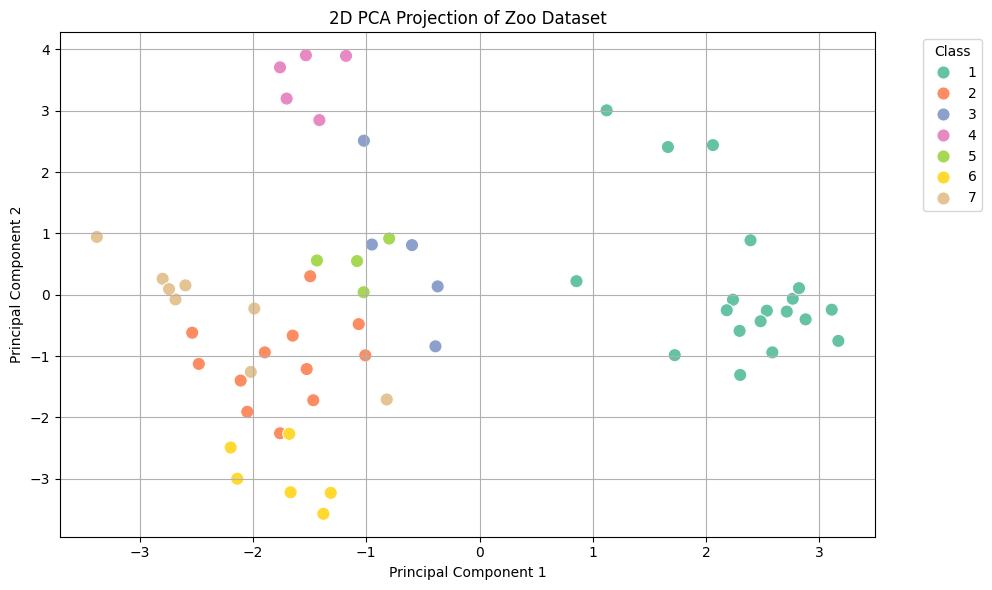

In [21]:

# Step 9: Cross-validation score
cv_score = cross_val_score(knn, X_scaled, y, cv=5)
print(f"\nCross-Validation Accuracy (5-Fold): {cv_score.mean():.2f}")

# Step 10: PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Class'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Class', palette='Set2', s=90)
plt.title("2D PCA Projection of Zoo Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Lohith\AppData\Local\Temp\ipykernel_13996\1416390441.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class_label', data=zoo_df, palette='tab10')


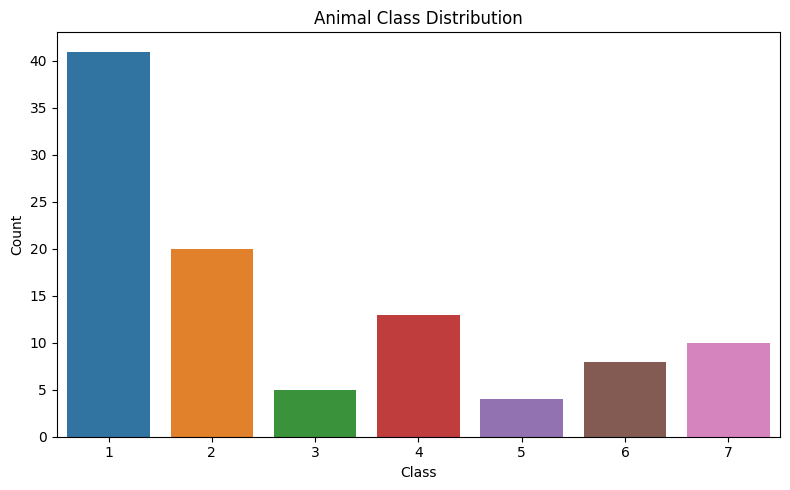

C:\Users\Lohith\AppData\Local\Temp\ipykernel_13996\1416390441.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_label', y='legs', data=zoo_df, palette='pastel')


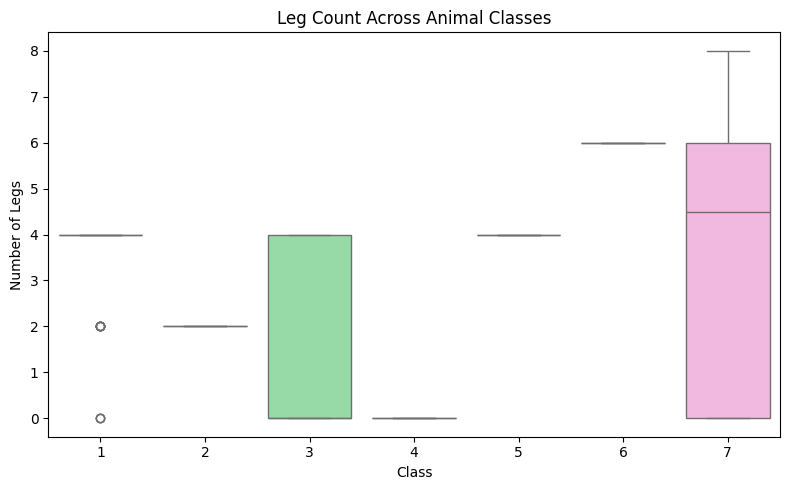

In [22]:
# Step 11: Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class_label', data=zoo_df, palette='tab10')
plt.title("Animal Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Step 12: Legs by class
plt.figure(figsize=(8, 5))
sns.boxplot(x='class_label', y='legs', data=zoo_df, palette='pastel')
plt.title("Leg Count Across Animal Classes")
plt.xlabel("Class")
plt.ylabel("Number of Legs")
plt.tight_layout()
plt.show()

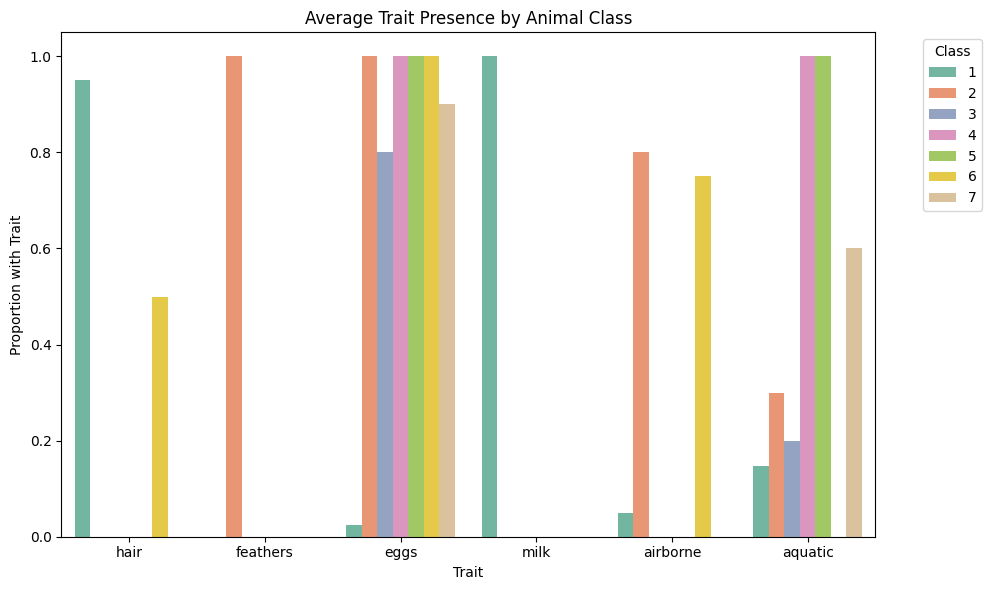


✅ Code Quality Checks:
➤ Missing values: 0
➤ Feature matrix shape: (101, 16)
➤ Target vector shape: (101,)
➤ Unique classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
➤ Final Test Accuracy: 1.00


In [23]:
# Step 13: Trait presence by class
selected_traits = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic']
avg_traits = zoo_df.groupby('class_label')[selected_traits].mean().reset_index()
melted_traits = avg_traits.melt(id_vars='class_label', var_name='Trait', value_name='Avg Presence')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_traits, x='Trait', y='Avg Presence', hue='class_label', palette='Set2')
plt.title("Average Trait Presence by Animal Class")
plt.ylabel("Proportion with Trait")
plt.xlabel("Trait")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 14: Final code quality checks
print("\n✅ Code Quality Checks:")
print(f"➤ Missing values: {zoo_df.isnull().sum().sum()}")
print(f"➤ Feature matrix shape: {X.shape}")
print(f"➤ Target vector shape: {y.shape}")
print(f"➤ Unique classes: {sorted(y.unique())}")
print(f"➤ Final Test Accuracy: {knn.score(X_test, y_test):.2f}")